<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/NTLanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1763147186031726


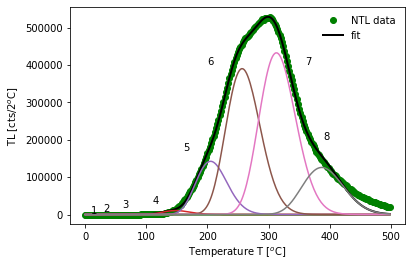

10.07324243616058
3781.858387793806 

10.499840344609973
4036.5207815291524 

2.423770039655914e-07
4832.140377129739 

10613.695953327968
2915.7194813091464 

142542.82191314187
5025.907545393506 

390721.1257424003
4485.5376592339435 

433113.97780774365
5627.093280414178 

126040.30528966452
2789.8647021501 

277.4183485724008
11037.278419597236 

321.000000000313
11187.62168994373 

351.00000000000006
355732703088.41644 

420.99999999999994
10.049112825148391 

478.1747992119309
1.8133275300785021 

529.759562439314
0.9667932163003768 

585.7978495847698
0.6091923760549762 

659.9999999999999
1.0110671716359572 



3.1763147186031726

In [18]:
#  deconvolution of microcline data natural TL (NTL)
#  with optimal number of peaks N=8
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import requests

# read data file from GitHub
url='https://raw.githubusercontent.com/vpagonis/Python-Codes/main/data/NTLbgd.TXT'
response=requests.get(url)
a=response.text
b=np.array(list(map(float,a.strip("[]").split())))
data=b.reshape(-1,2)

x_data,y_data = data[:, 0], data[:, 1] 
z,   kB =1.8, 8.617E-5

FOMS=[]
def TL(T, B,Tmax,En,rho):
    fm=4.90537*rho**1.21038  
    Fm=np.log(1+(1/fm)*(1-2*kB*T/En))
    F=np.log(1+(1/fm)*((T/Tmax)**2.0)*np.exp(-En*(Tmax-T)/\
    (kB*T*Tmax))*(1-2*kB*T/En))
    return np.abs(B)*np.exp(-En*(Tmax-T)/(kB*T*Tmax))*\
    ((F/Fm)**2.0)*\
    np.exp(-rho*(F**3.0)-F)/np.exp(-rho*(Fm**3.0)-Fm)   
def total_TL(T, *inis): 
    u=np.array([0 for i in range(len(x_data))])
    Bs, Tmaxs=    inis[0:nPks],inis[nPks:2*nPks]
    for i in range(nPks):
        u=u+TL(T,Bs[i],Tmaxs[i],Ens[i],rho)
    return u
fils=['expt0 110.txt','expt0 160.txt','expt0 220.txt','expt0 325.txt']
symbs=['x','o','^','+','*','d']
labls=['0$^{o}$C','100$^{o}$C','150$^{o}$C','200$^{o}$C','250$^{o}$C','300$^{o}$C']

x_data=x_data+273.15
z,   kB =1.8, 8.617E-5
nPks=8
rho=.0136
Ens=[6.54929426e-01, 7.80041169e-01, 8.54269410e-01, 9.54000000e-01,
   1.07468656e+00, 1.19741241e+00, 1.38098872e+00, 1.55460753e+00]  
Tmaxs=[279.0,331.0,361.0,411.0,470.0,520.0,580.0,650]
Tmaxlow=[x-10 for x in Tmaxs]
Tmaxhigh=[x+10 for x in Tmaxs]

imaxs=[1e6]*8
imaxlow=[0 for x in imaxs]
imaxhigh=[10*x for x in imaxs]
inis=imaxs+Tmaxs
params, cov = optimize.curve_fit(total_TL,x_data,y_data,\
p0=inis,bounds=(imaxlow+Tmaxlow,imaxhigh+Tmaxhigh))

plt.plot(x_data-273.15, y_data,'go',label='NTL data');
TL1=total_TL(x_data,  *params)
plt.plot(x_data-273.15, TL1,'k-',linewidth=2,label='fit'); 
for i in range(0,nPks): 
    plt.plot(x_data-273.15, TL(x_data, params[i],params[nPks+i],Ens[i],rho));

res=total_TL(x_data, *params)-y_data
FOM=100*np.sum(abs(res))/np.sum(y_data)
print(FOM)
FOMS.append(FOM)
plt.ylabel('TL [cts/2$^{o}$C]');
plt.xlabel(r'Temperature T [$^{o}$C]');
plt.text(10,2000,'1');
plt.text(30,7000,'2');
plt.text(60,19000,'3');
plt.text(110,30000,'4');
plt.text(160,170000,'5');
plt.text(200,400000,'6');
plt.text(360,400000,'7');
plt.text(390,200000,'8');
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.show()
